# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


Pandas does not only let you group by a column name. In `df.groupby(grouper)` can be many things:

- Series (or string indicating a column in df)
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex



In [5]:
df.groupby(lambda x: x % 2).mean()

,data
0,10
1,10


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [6]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

In [8]:
def find_decade(x):
    return int(x / 10)*10

In [9]:
titles['decade'] = titles['year'].apply(find_decade)

In [10]:
cast['decade'] = cast['year'].apply(find_decade)

In [11]:
titles.groupby('decade').count()

,title,year
decade,,
1890,4,4
1900,36,36
1910,6367,6367
1920,8675,8675
1930,9970,9970
...,...,...
1980,19313,19313
1990,21339,21339
2000,37897,37897


<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

In [12]:
# showing also years in which it hasn't been made
titles['title'].eq('Hamlet').astype(int).groupby(titles['decade']).sum()

decade
1890    0
1900    0
1910    3
1920    1
1930    0
       ..
1980    1
1990    2
2000    2
2010    4
2020    0
Name: title, Length: 14, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [13]:
cast[(cast['decade'] == 1950) & (cast['n'] == 1)].groupby(['decade','year', 'type']).sum()

n
decade year type          
1950   1950 actor    604.0
            actress  271.0
       1951 actor    633.0
            actress  272.0
       1952 actor    591.0
...                    ...
       1957 actress  284.0
       1958 actor    694.0
            actress  275.0
       1959 actor    678.0
            actress  287.0

[20 rows x 1 columns]

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [14]:
cast[(cast['decade'] >= 1990) & (cast['n'] == 1)]['name'].value_counts().iloc[0:10]

Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
Name: name, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [15]:
#filling NaNs which must be counted but are not with .count() or .values_count()
    
cast_2 = cast.fillna(0) 

In [16]:
cast_2[cast_2['title'] == 'The Pink Panther'].groupby('year').count()['n']

year
1963    19
2006    89
Name: n, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [17]:
cast_3 = cast[cast['name'] == 'Frank Oz'].sort_values(by=['year']).groupby(['year','title']).count()['n']

In [18]:
cast_3[cast_3 >1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
Name: n, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [19]:
cast_4 = cast[cast['name'] == 'Frank Oz']['character'].value_counts()

In [20]:
cast_4[cast_4 > 1]

Miss Piggy        6
Animal            6
Sam the Eagle     5
Yoda              5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
Name: character, dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [21]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [22]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [23]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [24]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [25]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [26]:
#it's late, I don't know what I'm doing, definitely not thinking in pandas terms
n_of_roles = cast.fillna(0).groupby('title').count()['n']  

In [27]:
#yep, list comprehension overtook the situation: creating serie to concatenate
roles = pd.Series([n_of_roles[name] for name in list(cast['title'])], name='num_roles')    

In [28]:
cast_5 = cast.join(roles)

In [29]:
cast_5[cast_5['title']=='Stop Pepper Palmer'] # checking if worked

,title,year,name,type,character,n,decade,num_roles
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,2010,34
152784,Stop Pepper Palmer,2014,Spencer Belnap,actor,Lawyer,NaN,2010,34
196667,Stop Pepper Palmer,2014,Carlton Bluford,actor,Jerome Johnson,NaN,2010,34
330455,Stop Pepper Palmer,2014,Nasheda Caudle,actor,Back up Dancer,NaN,2010,34
526070,Stop Pepper Palmer,2014,Andrew Diaz,actor,Pepper Palmer,NaN,2010,34
...,...,...,...,...,...,...,...,...
3005309,Stop Pepper Palmer,2014,Rachel Patten-Moskios,actress,Club Patron,NaN,2010,34
3116851,Stop Pepper Palmer,2014,Amy Savannah,actress,Too Short's Girlfriend,NaN,2010,34
3172212,Stop Pepper Palmer,2014,Eve Speer,actress,Trustee,NaN,2010,34
3176796,Stop Pepper Palmer,2014,Catherine Standiford,actress,Club Patron,NaN,2010,34


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.     
</div>

Tip: you can to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.

In [30]:
count = cast[cast['n'] == 1][['decade','type','n']].groupby(['decade', 'type']).count()

In [31]:
total = cast[cast['n'] == 1].groupby(['decade']).sum().drop('year', axis=1)

In [32]:
count / total

n
decade type             
1900   actor    0.833333
       actress  0.166667
1910   actor    0.466369
       actress  0.533631
1920   actor    0.598080
...                  ...
2000   actress  0.295464
2010   actor    0.700398
       actress  0.299602
2020   actor    0.750000
       actress  0.250000

[26 rows x 1 columns]

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [33]:
s = 'Bradwurst'

In [34]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [35]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])

In [36]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet', and that start with 'Hamlet':
</div>

In [37]:
titles[titles['title'].str.contains('Hamlet')].sort_values(by=['year'])

,title,year,decade
43511,Hamlet,1910,1910
195015,Hamlet,1911,1910
154627,Hamlet,1913,1910
67896,A Sagebrush Hamlet,1919,1910
91710,Hamlet,1921,1920
...,...,...,...
202788,Hamlet (III),2015,2010
108012,Hamlet (II),2016,2010
12007,Hamlet (A Modern Adaptation),2016,2010
26160,Hamlet,2016,2010


In [38]:
titles[titles['title'].str.startswith('Hamlet')].sort_values(by=['year'])

,title,year,decade
43511,Hamlet,1910,1910
195015,Hamlet,1911,1910
154627,Hamlet,1913,1910
91710,Hamlet,1921,1920
5562,Hamlet,1948,1940
...,...,...,...
36465,"Hamlet, Son of a Kingpin",2015,2010
108012,Hamlet (II),2016,2010
26160,Hamlet,2016,2010
12007,Hamlet (A Modern Adaptation),2016,2010


<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 movie titles with the longest name.
</div>

In [39]:
indx = titles['title'].str.len().sort_values(ascending=False).index
titles.reindex(indx).iloc[0:10,:]

,title,year,decade
127048,Night of the Day of the Dawn of the Son of the...,2011,2010
28483,Night of the Day of the Dawn of the Son of the...,2005,2000
103597,Maverick and Ariel's First Ever Ever Movie Hol...,2010,2010
8396,The Fable of the Kid Who Shifted His Ideals to...,1916,1910
108020,Those Magnificent Men in Their Flying Machines...,1965,1960
85693,"Film d'amore e d'anarchia, ovvero 'stamattina ...",1973,1970
206303,Ontologica! or a Brief Explanation of Absolute...,2012,2010
122757,The Official Motion Pictures of the Heavyweigh...,1927,1920
52929,Something Strange: 23 Peculiar Perspectives of...,2012,2010
187654,"The Personal History, Adventures, Experience, ...",1935,1930


## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [40]:
titles.title.value_counts().head()

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Blood Money             11
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [41]:
titles.year.value_counts().head()

2015    13978
2014     8209
2013     7664
2012     7273
2011     6844
Name: year, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

In [42]:
graph = titles.year.value_counts().sort_index()

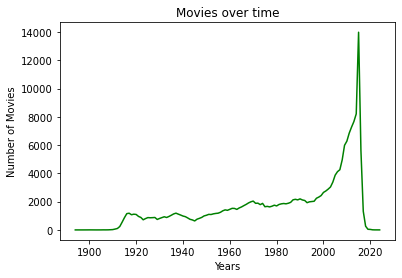

In [43]:
plt.plot(graph, color='green');
plt.xlabel('Years');
plt.ylabel('Number of Movies');
plt.title('Movies over time');

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

In [44]:
graph_1 = titles['title'].eq('Hamlet').astype(int).groupby(titles['decade']).sum()

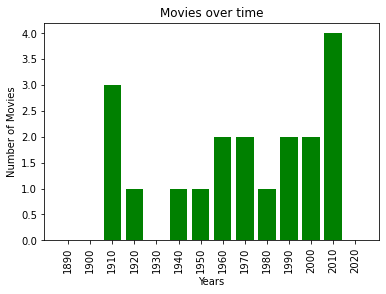

In [45]:
plt.bar([n for n in range(len(graph_1.index))], graph_1.values, tick_label=graph_1.index, color='green');
plt.xlabel('Years');
plt.ylabel('Number of Movies');
plt.title('Movies over time');
plt.xticks(rotation='vertical');

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [46]:
cast.character.value_counts().iloc[0:11]

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
               ...  
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: character, Length: 11, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [47]:
cast[cast['year'] == 2010].name.value_counts().iloc[0:10]

Lloyd Kaufman           23
Suraaj Venjarammoodu    20
Chris (II) Eddy         20
Jagathi Sreekumar       20
Danny Trejo             17
Matt Simpson Siegel     17
Ben (II) Bishop         15
Joe Estevez             15
Brahmanandam            15
Kyle Rea                15
Name: name, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

In [48]:
# Brad Pitt started out in 1987.
graph_2 = cast['name'].eq('Brad Pitt').astype(int).groupby(cast['year']).sum().loc[1987:2021]

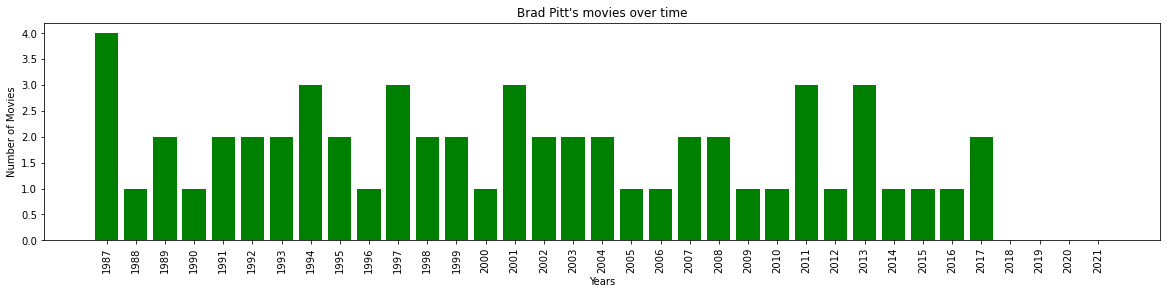

In [49]:
plt.figure(figsize=(20,4))
plt.bar([n for n in range(len(graph_2.index))], graph_2.values, tick_label=graph_2.index, color='green');
plt.xlabel('Years');
plt.ylabel('Number of Movies');
plt.title('Brad Pitt\'s movies over time');
plt.xticks(rotation='vertical');


<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [58]:
# Paraphrased as what are the 10 movies with the most roles whose titles start with "The Life"

cast[cast['title'].str.startswith('The Life')][['title','n']]\
.groupby('title').count().sort_values(by='n', ascending=False).head(10)

,n
title,
The Life of David Gale,78
The Life Aquatic with Steve Zissou,77
The Life and Death of Peter Sellers,57
The Life and Hard Times of Guy Terrifico,50
The Life and Times of Judge Roy Bean,46
The Life Before This,41
The Life and Death of Colonel Blimp,40
The Life and Adventures of Nicholas Nickleby,37
The Life Zone,32


<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [ ]:
cast[(cast['n'] == 1) & (cast['decade'] == 1950)][['type','n']].groupby(['type']).count()

In [ ]:
cast[(cast['n'] == 1) & (cast['decade'] == 2000)][['type','n']].groupby(['type']).count()